## 7.2 Oxygen starvation under growth conditions

### Gas-liquid mass transfer



Aerobic microbes require oxygen as electron acceptor in oxidative phosphorylation. During fermentation all microbes are submerged in the liquid broth. Accordingly there will be no contact between the organism and air. Even gas bubbles in the fermenter is not in direct contact with the organism swimming in the mixture. Oxygen thus has to dissolve in the water and the microbes have to breathe under water like fish. 

<img src="sparger.jpg" width="350" />

When air is exposed to water at atmospheric pressure and fermentation temperatures the maximum (or saturated) concentration of oxygen in the liquid is in the vicinity of $6-8 \frac{mg}{L}$ (1.9e-4 to 2.5e-4 $\frac{mol\,O_2}{L}$). This is not a lot of oxygen for oxygen hungry microbes, especially if the concentration of microbes in the fermenter is high. This small amount of oxygen is rapidly consumed in the fermenter and continuous replacement of oxygen is required. This is achieved by constant sparging of air and vigorous mixing in the fermenter. The mathematical formulation of the volumetric mass transfer rate is given by:

$$r_{O_2}^{mt}=k_La \cdot \left(C_{O_2}^{sat}-C_{O_2} \right)$$
--------
$$ \left[ \frac{mol\,O_2}{L\cdot h}  \right] = \left[ \frac{1}{h} \cdot \frac{mol\,O_2}{L}  \right]$$

Note that $r_{O_2}^{mt}$ uses the same rate definition as all volumetric rates in this course. The rate is defined by a mass transfer coefficient ($k_La$) multiplied by a concentration difference between the saturated oxygen concentration ($C_{O_2}^{sat}$) and the oxygen concentration in the fermenter ($C_{O_2}$). The chemical engineering approach is to assume that all liquid on the gas-liquid interface (edge of bubbles) are saturated (at $C_{O_2}^{sat}$ ) while $C_{O_2}$ will always be less than $C_{O_2}^{sat}$. The mass transfer coefficient (note the units) is determined by the air flowrate, sparger and impeller characteristics but will be supplied in this course.

It is **very important** to understand that under steady state conditions the volumetric consumption rate of oxygen by the organisms ($r_{O_2}$) is equal to the rate at which oxygen is transferred into the medium ($r_{O_2}^{mt}$). Accordingly there will be no accumulation of oxygen in the liquid. For non-steady state fermenters like batch and fed-batch systems we use a pseudo steady state approximation where the same condition applies:

$$r_{O_2}^{mt}=r_{O_2}$$
----

Given a certain oxygen demand by the microbes ($r_{O_2}$) we can calculate $C_{O_2}$ if $k_La$ is known. Before doing this you should understand that the maximum transfer rate of oxygen will be given by:

$$r_{O_2}^{mt_{max}}=k_La \cdot C_{O_2}^{sat}$$
--------

We can now define a range of possible $r_{O_2}$ values which will be a function microbe stoichiometry, concentration and physiology ($\mu$ and $\theta$). We'll define an arbitrary range in Python upto the maximum vlaue and define a $k_La$ value:

In [1]:
import numpy
kLa=300        #1/h
C_o2_sat=2e-4  #mol/L
r_o2_mtmax= kLa*C_o2_sat 
r_o2=numpy.linspace(0,r_o2_mtmax,100) 

We can manipulate the above equations in order to show that:

$$C_{O_2}=\frac{k_LaC_{O_2}^{sat}-r_{O_2}}{k_La}  $$

Accordingly we can calculate $C_{O_2}$ over the range of $r_{O_2}$ values:

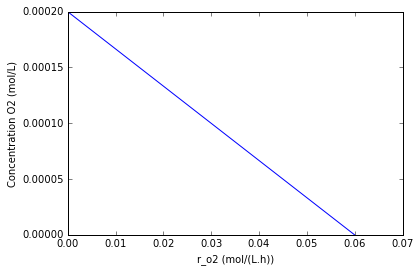

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline 
C_o2=(kLa*C_o2_sat-r_o2)/kLa
plt.plot(r_o2, C_o2, color='blue')
plt.ylabel('Concentration O2 (mol/L)') 
plt.xlabel('r_o2 (mol/(L.h))') 
plt.show()

It is evident from the graph that $C_{O_2}$ will decrease as $r_{O_2}$ increases upto the point where the maximum possible rate is achieved at $C_{O_2}=0$. If the microbes require a $r_{O_2}$ greater that $r_{O_2}^{mt_{max}}$ they simply won't get more than the maximum. This will imply that the generation of ATP will be compromised and accordingly less ATP will be available. Under these conditions the organism will fulfil its maintenance energy requirements and sacrifice on its growth rate (stay alive first and grow with the extra energy available). We will refer to this condition as oxygen starvation where the rate of oxygen consumption is controlled (or determined) by the mass transfer rate.

For conditions where $r_{O_2}<r_{O_2}^{mt_{max}}$ fermentation can continue in the usual manner. A low value of $C_{O_2}$ will indicate that starvation is near. The $C_{O_2}$ can be measured in the fermenter and is referred to as the DO measurement.

<img src="DO.png" width="300" />

### Example on oxygen starvation

In this example we'll look at aerobic growth on glucose in a batch fermenter We'll start by defining the physiological properties of the microbe:

|$\alpha \qquad \qquad$|$\gamma \qquad \qquad $|$\mu_{max} \qquad$|$\theta_{max}\qquad$| $(P/O)$ $\qquad \qquad$
|----|-|-|-|-
|$\frac{cmol\,CO_2}{cmol \, X}$|$\frac{mol \, ATP}{Cmol \, X}$|$\frac{1}{h}$|$\frac{mol \, ATP}{cmol\,X\cdot h}$|$\frac{mol\,ATP}{mol\, O}$
|0.1|2.5|0.3|0.1|1.5

The biomass formula is given by $CH_{1.8}O_{0.5}N_{0.2}$

The following Monod characteristics are known:

|$K_M\left[\frac{mg}{L} \right] \qquad$ |
 -|-
 **Growth**|30 
**Maintenance**|5 

Since only $CO_2$ will be formed as product, zero product inhibition is present. The following conditions are specified for the batch fermenter:

|V [$L$]|$C_X^o \left[ \frac{g}{L}\right]$|$C_S^o \left[ \frac{g}{L}\right]$
|-------------|-------|------
|2000|0.25 $\qquad$|150 $\qquad$

We can now define the parameters:

In [19]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline 
from scipy.integrate import odeint
alpha, gamma, mu_max, theta_max, PO = 0.1, 2.5, 0.3, 0.1, 1.5
Km_mu, Km_theta = 30/1000/30, 5/1000/30
Mx=12+1.8+0.5*16+0.2*14
V, Cxo, Cso = 200, 0.25/Mx/10, 150/30

We can also define $k_La$ and $C_{O_2}^{sat}$ as 170$\frac{1}{h}$ and 7$\frac{mg}{L}$: 

In [20]:
kla=220
Co_s_max=7/1000/32  #mol/l

We can quickly determine the stoichiometric coeffisients with a flux model. Make sure you agree:

In [21]:
Sg = numpy.matrix([[1.1, 1,0],
                  [0.1,2,-2],
                  [-2.5,2/3,3]])

Cg= numpy.matrix([[1,0,0]]).T
Yg = numpy.linalg.solve(Sg,Cg)

Sm = numpy.matrix([[1.1, 1,0],
                  [0.1,2,-2],
                  [1,0,0]])

Cm= numpy.matrix([[1,0,0]]).T
Ym = numpy.linalg.solve(Sm,Cm)

Yxs_g=1/Yg[0,0]
Yxc_g=(Yg[1,0]+0.1*Yg[0,0])/Yg[0,0] # CO2 from respiration and biomass formation
Yxo_g=Yg[2,0]/Yg[0,0]
Ysatp_m=2/3*Ym[1,0]+3*Ym[2,0]
Yatps_m=1/Ysatp_m
Yatpc_m=Ym[1,0]/Ysatp_m
Yatpo_m=Ym[2,0]/Ysatp_m

Note that we will be defining $O_2$ and $CO_2$ rates so that:

$$r_{O_2}^{'}=Y_{XO}^G\cdot \mu+Y_{ATP\,O}^M \cdot  \theta$$

$$r_{CO_2}^{'}=Y_{XC}^G\cdot \mu+Y_{ATP\,C}^M \cdot  \theta$$

Under growth conditions $CO_2$ is produced from respiration ($v_2$) and biomass formation ($v_1$).

We can now set up the reponse function by separating 'free growth' from 'oxygen starvation'. Under starvation conditions the microbe will first use oxygen for maintenance. We thus have to determine the rate of oxygen required for maintenance:

$$r_{O_2}^{\theta}=Y_{ATP\,O}^M\cdot \theta\cdot C_X $$

Note that the above is a **volumetric rate**. The remainder of the oxygen will be used for growth and can be calculated as:

$$r_{O_2}^{\mu}= r_{O_2}^{mt_{max}}-r_{O_2}^{\theta} $$

The $r_{O_2}^{\mu}$ term (volumetric) will now determine the growth rate which will be slower than before. We'll have to rewrite the stoichiometric relationships such that $r_{O_2}^{\mu}$ instead of $\mu$ 'drives' the growth related rates. The biomass based reaction rates will become:

$$r_X^{'}=Y_{OX}^{G}\cdot \frac{r_{O_2}^{\mu}}{C_X}  $$

$$-r_S^{'}=Y_{OS}^{G}\cdot \frac{r_{O_2}^{\mu}}{C_X}+Y_{ATP\,S}^M\cdot \theta  $$

$$r_{O_2}^{'}=\frac{r_{O_2}^{\mu}}{C_X}+ {Y_{ATP\,O}^M\cdot \theta}=\frac{r_{O_2}^{mt_{max}}}{C_X}$$

$$-r_{CO_2}^{'}=Y_{OC}^{G}\cdot \frac{r_{O_2}^{\mu}}{C_X}+Y_{ATP\,C}^M\cdot \theta  $$

We can now code for the response function, but let's calculate the oxygen based yield coefficients first:



In [39]:
Yox_g=Yg[0,0]/Yg[2,0]
Yos_g=1/Yg[2,0]
Yoc_g=(Yg[1,0]+0.1*Yg[0,0])/Yg[2,0]

Finaly the response function:

In [23]:
def r_prime(C):
    Cx, Cs = C          
    mu=mu_max*Cs/(Km_mu+Cs)
    theta=theta_max*Cs/(Km_theta+Cs)
    
    ro_mt=kla*Co_s_max
    ro=(Yxo_g*mu +Yatpo_m*theta)*Cx  # volumetric, positive value representing depletion
    
        
    if ro_mt > ro:     #no oxygen limitation
        
        return [mu,
               -(Yxs_g*mu + Yatps_m*theta),     
               Yxc_g*mu + Yatpc_m*theta,                                #rCO2
               Yxo_g*mu + Yatpo_m*theta]                                #rO2 depletion
                                                                         
     
    else:
        
        ro_theta=Yatpo_m*theta*Cx  #volumetric
        ro_mu=ro_mt-ro_theta
        
        return [Yox_g*(ro_mu/Cx),
               -(Yos_g*(ro_mu/Cx) + Yatps_m*theta),
                Yoc_g*(ro_mu/Cx) + Yatpc_m*theta,
                (ro_mt/Cx)]    

You might wonder what will happen if the oxygen supply is less than what is required for maintenance. This is a scenario where the microbe will go into remission (not enough energy to sustain life). We won't model this scenario but a batch or fed-batch system won't run into this scenario if $k_La$ is maintained at a constant value. See if you can figure out why. 

We can now integrate like before:

In [24]:
def dNdt_fun(N,t):
    Cx, Cs, V = N[0]/N[2],N[1]/N[2],N[2]  #calculating and naming concentration and volume 
    r=r_prime([Cx, Cs])
        
    return [Qf*Cxf-Q*Cx+(r[0])*Cx*V,
            Qf*Csf-Q*Cs+(r[1])*Cx*V,    
            Qf-Q] 

In [25]:
def solve_ferm(tmax):
    tspan=numpy.linspace(0,tmax,300)             #define the timespan of the integration
    N = odeint(dNdt_fun, No, tspan)

    Cx=N[:,0]/N[:,2]                           #devide cmol amount by the volume to get concentration 
    Cs=N[:,1]/N[:,2]
    V=N[:,2]

    plt.plot(tspan, Cs, color='red',label='s')
    plt.plot(tspan, Cx, color='green',label='x')
    plt.legend(loc='best')
    plt.ylabel('Concentration cmol/L') 
    plt.xlabel('time (h)') 
    plt.show()

    return N,tspan, Cx, Cs

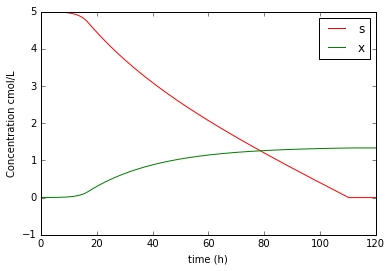

In [26]:
Co=numpy.array([Cxo, Cso, 1])     #[X, S, P, V]             
No=Co*V
Qf=Q=Cxf=Csf=Cpf=0 
kla=170
N,tspan, Cx, Cs =solve_ferm(120)

We can compare with the scenario where there is no oxygen limitation by defining a very large $k_La$: 

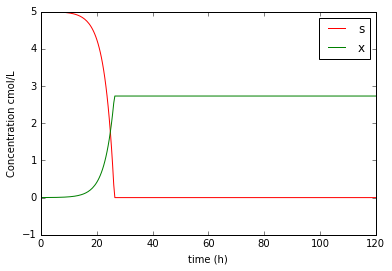

In [27]:
kla=4000
N1,tspan1, Cx1, Cs1 =solve_ferm(120)

Quite a difference! Compare the biomass yields and productivity. Apart from the oxygen starved run being much slower, it is evident that a major fraction of substrate is lost on maintenance (compare the final $C_X$ values). Hopefully you now understand that oxygen mass transfer rates can have an detrimental effect on fermenter outcome!

Let's examine all the rates, but remember to set the $k_La$ back to the original.

In [36]:
kla=220

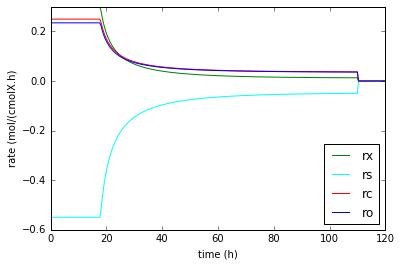

In [29]:
Ci=(N[:, :2].T/N[:, 2]).T                   
r=numpy.asarray([r_prime(C) for C in Ci])

Cx=N[:,0]/N[:,2] 

rs=r[:,1]
rx=r[:,0]
rc=r[:,2]
ro=r[:,3] 

plt.plot(tspan, rx, color='green',label='rx')
plt.plot(tspan, rs, color='cyan',label='rs')
plt.plot(tspan, rc, color='red',label='rc')
plt.plot(tspan, ro, color='blue',label='ro')

plt.legend(loc='best')
plt.ylabel('rate (mol/(cmolX.h)') 
plt.xlabel('time (h)') 
plt.show()


From the graph of the cell based rates ($r^{'}$) it is clear that an event occurs just before 20 hours. This will be the point where the 'regime' change occur and where the fermenter becomes 'mass transfer controlled'. From this point onwards everything happens slower per cell. The decrease in growth rate cause the decrease in substrate consumption rate. The cell based oxygen consumption rate ($r_O^{'}$) also decreases despite the constant volumetric rate ($r_O^{mt_{max}}$). This is caused by the increase in cell concentration ($C_X$) after the 'regime' cahnge. 

We can also plot the volumetric rates:

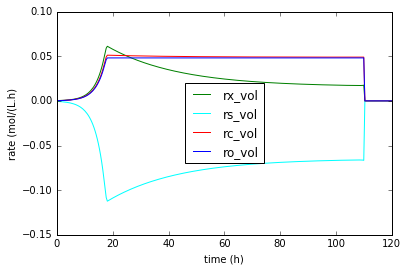

In [30]:
rs_vol=r[:,1]*Cx
rx_vol=r[:,0]*Cx
rc_vol=r[:,2]*Cx
ro_vol=r[:,3]*Cx 

plt.plot(tspan, rx_vol, color='green',label='rx_vol')
plt.plot(tspan, rs_vol, color='cyan',label='rs_vol')
plt.plot(tspan, rc_vol, color='red',label='rc_vol')
plt.plot(tspan, ro_vol, color='blue',label='ro_vol')

plt.legend(loc='best')
plt.ylabel('rate (mol/(L.h)') 
plt.xlabel('time (h)') 
plt.show()

The 'regime' change point is also clear on this graph. Growth only terminates when the substrate gets depeleted (at the sudden Monod step at the end). The oxygen and $CO_2$ rates are very similar and the slight difference observable just after the 'regime' change is linked to the extra $CO_2$ formed in the production of biomass. 

Let's have a look at the DO ($C_{O_2}$) as a function of time.

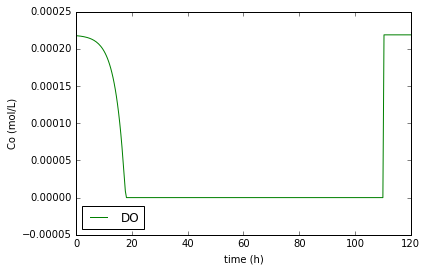

In [38]:
C_o2=(kla*Co_s_max-ro_vol)/kla
plt.plot(tspan, C_o2, color='green',label='DO')

plt.legend(loc='best')
plt.ylabel('Co (mol/L)') 
plt.xlabel('time (h)') 
plt.show()


It is evident that $C_{O_2}$ becomes zero at the 'regime' change. It remains zero until all metabolic activity seizes (substrate depleted). After this the non-reacting mixture is saturated with oxygen.

### Take extra care in understanding the rate derivations! Oxygen supply is an important aspect of aerobic fermentation!

<img src="suffocate.jpg" width="300" />